In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels1 = []
    labels2 = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        img = Image.open(filename).convert('L')
        img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(160, 128), grayscale=True)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        labels1.append(round(float(name.split('_')[0].split('-')[0]), 1))
        labels2.append(round(float(name.split('_')[0].split('-')[1]), 1))
        images.append(image)
    return images, labels1, labels2

In [22]:
# load images from both train and test groups
directory = '../data/Patate_Pics/Training'
images, labels1, labels2 = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Patate_Pics/Validation'
images_val, labels1_val, labels2_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 643
Loaded Images and labels for validation: 105


In [23]:
#normalise datas
images = np.array(images)
images /= 255
images_val = np.array(images_val)
images_val /= 255

In [24]:
#convert to np.array
labels1 = np.array(labels1)
labels2 = np.array(labels2)
labels1_val = np.array(labels1_val)
labels2_val = np.array(labels2_val)

In [25]:
#convert datas to dummyvalues
labels1d = pd.get_dummies(labels1)
labels2d = pd.get_dummies(labels2)

In [28]:
labels1d.shape, labels2d.shape

((643, 10), (643, 10))

In [27]:
#append empty columns
labels1d.insert(0, column='0.1', value=0, allow_duplicates=False)
labels2d.insert(0, column='0.1', value=0, allow_duplicates=False)
labels1d, labels2d

(     0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
 0      0    1    0    0    0    0    0    0    0    0
 1      0    0    1    0    0    0    0    0    0    0
 2      0    0    1    0    0    0    0    0    0    0
 3      0    0    1    0    0    0    0    0    0    0
 4      0    0    1    0    0    0    0    0    0    0
 5      0    0    0    1    0    0    0    0    0    0
 6      0    0    0    1    0    0    0    0    0    0
 7      0    0    0    0    1    0    0    0    0    0
 8      0    0    0    0    1    0    0    0    0    0
 9      0    0    0    0    1    0    0    0    0    0
 10     0    0    0    0    1    0    0    0    0    0
 11     0    0    0    0    1    0    0    0    0    0
 12     0    0    0    0    1    0    0    0    0    0
 13     0    0    0    0    1    0    0    0    0    0
 14     0    0    0    0    1    0    0    0    0    0
 15     0    0    0    0    1    0    0    0    0    0
 16     0    0    0    0    1    0    0    0    0    0
 17     0 

In [29]:
#convert to np.array again
labels1d = np.array(labels1d)
labels2d = np.array(labels2d)

In [30]:
#check if OK
labels1[1], labels1d[1]

(0.29999999999999999, array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [31]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [32]:
K.clear_session()

img_in = Input(shape=(160, 128, 1), name='img_in')

x = img_in

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

flat = Flatten()(x)

out1 = Dense(10, activation='softmax')(flat)
out2 = Dense(10, activation='softmax')(flat)

model = Model(inputs=[img_in], outputs=[out1, out2])
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer='adadelta', metrics=['accuracy'])

In [33]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_in (InputLayer)              (None, 160, 128, 1)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 160, 128, 8)   80          img_in[0][0]                     
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 80, 64, 8)     0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 80, 64, 16)    1168        max_pooling2d_1[0][0]            
___________________________________________________________________________________________

In [34]:
h = model.fit(images, [labels1d, labels2d], batch_size=1, epochs=50, verbose=1)

Epoch 1/50
643/643 [==============================] - 19s - loss: 3.3591 - dense_1_loss: 1.6455 - dense_2_loss: 1.7136 - dense_1_acc: 0.3530 - dense_2_acc: 0.2830    
Epoch 2/50
643/643 [==============================] - 18s - loss: 3.2470 - dense_1_loss: 1.5845 - dense_2_loss: 1.6625 - dense_1_acc: 0.3530 - dense_2_acc: 0.2955    
Epoch 3/50
643/643 [==============================] - 18s - loss: 3.2297 - dense_1_loss: 1.5871 - dense_2_loss: 1.6425 - dense_1_acc: 0.3530 - dense_2_acc: 0.3002    
Epoch 4/50
643/643 [==============================] - 18s - loss: 3.1917 - dense_1_loss: 1.5695 - dense_2_loss: 1.6222 - dense_1_acc: 0.3593 - dense_2_acc: 0.3406    
Epoch 5/50
643/643 [==============================] - 18s - loss: 3.1116 - dense_1_loss: 1.5497 - dense_2_loss: 1.5618 - dense_1_acc: 0.3639 - dense_2_acc: 0.3593    
Epoch 6/50
643/643 [==============================] - 18s - loss: 3.0735 - dense_1_loss: 1.5348 - dense_2_loss: 1.5387 - dense_1_acc: 0.3888 - dense_2_acc: 0.3904   

643/643 [==============================] - 18s - loss: 0.0136 - dense_1_loss: 0.0021 - dense_2_loss: 0.0115 - dense_1_acc: 1.0000 - dense_2_acc: 0.9984    
Epoch 50/50
643/643 [==============================] - 18s - loss: 0.0147 - dense_1_loss: 0.0141 - dense_2_loss: 5.7390e-04 - dense_1_acc: 0.9984 - dense_2_acc: 1.0000    


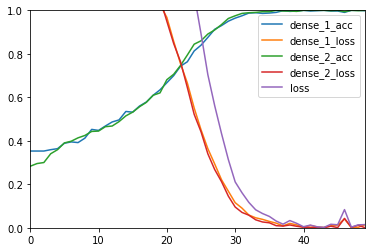

In [35]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [39]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx1 = np.argmax(all_preds[0], axis=1)
idx2 = np.argmax(all_preds[1], axis=1)

i = 0
for value1 in idx1:
    idx1[i] = value1 + 1
    i = i + 1
i = 0
for value2 in idx2:
    idx2[i] = value2 + 1
    i = i + 1

idx1, idx2, labels1_val, labels2_val

(array([ 8,  7,  6,  8,  6,  6,  9,  6,  8,  7,  6,  7,  7,  8,  9,  6,  7,
         8,  7,  6,  7,  7,  7,  8,  7,  7,  6,  7,  6,  8,  7,  7,  8,  6,
         7,  8,  9,  8,  8,  8,  7,  6,  8,  9,  8,  9,  7,  7,  8,  8,  8,
         7,  8,  8,  8,  8,  8,  6,  8,  8,  7,  6,  7,  9,  8,  8,  8,  8,
         7, 10,  6,  8,  8,  6,  9,  9,  7,  9,  9,  8,  8,  8,  7,  9,  9,
         6,  7,  6,  7,  9,  9,  7,  9,  6,  8,  8,  9, 10,  7,  7,  8,  8,
         9,  9,  7], dtype=int64),
 array([9, 8, 8, 9, 8, 6, 9, 8, 9, 7, 8, 7, 5, 8, 7, 7, 9, 5, 8, 8, 8, 3, 5,
        8, 8, 7, 5, 8, 8, 8, 5, 7, 9, 8, 8, 8, 6, 8, 5, 8, 9, 8, 9, 9, 8, 8,
        8, 8, 9, 8, 8, 8, 8, 7, 9, 8, 7, 8, 8, 8, 8, 7, 6, 9, 6, 6, 8, 8, 8,
        5, 6, 7, 8, 8, 9, 7, 8, 8, 8, 5, 7, 8, 8, 7, 8, 8, 6, 9, 7, 8, 8, 8,
        9, 8, 6, 8, 9, 5, 8, 7, 6, 8, 7, 8, 7], dtype=int64),
 array([ 0.4,  0.4,  0.4,  0.4,  0.4,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,
         0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.

In [40]:
predicted_ratio = []
label_ratio = []
se = 0
i = 0
for value in idx1:
    predicted_ratio.append(idx1[i] / idx2[i])
    label_ratio.append(labels1_val[i] / labels2_val[i])
    se += ((predicted_ratio[i]-label_ratio[i])*(predicted_ratio[i]-label_ratio[i]))
    i = i + 1
mse = se/nb_images_val
mse

0.064345816986406568

In [41]:
model.save('test_model.h5')